In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [2]:
med_data=pd.read_csv("insurance.csv")
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
med_data.shape

(1338, 7)

# Info about Dataset

In [4]:
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Statistical Report of Dataset

In [5]:
med_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


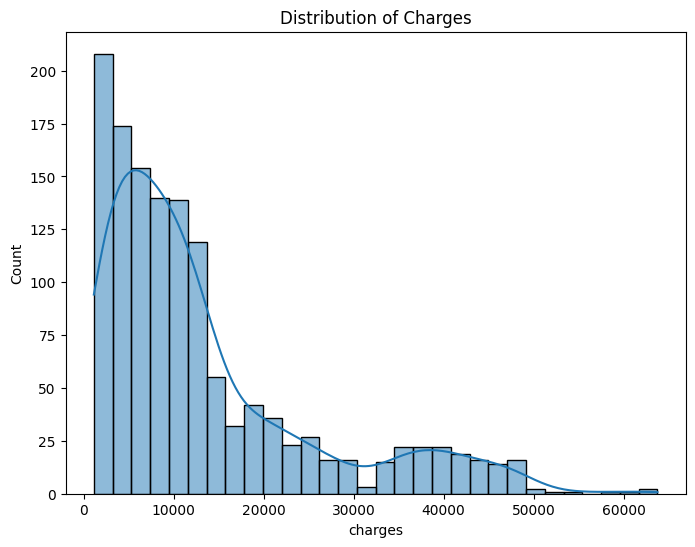

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(med_data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

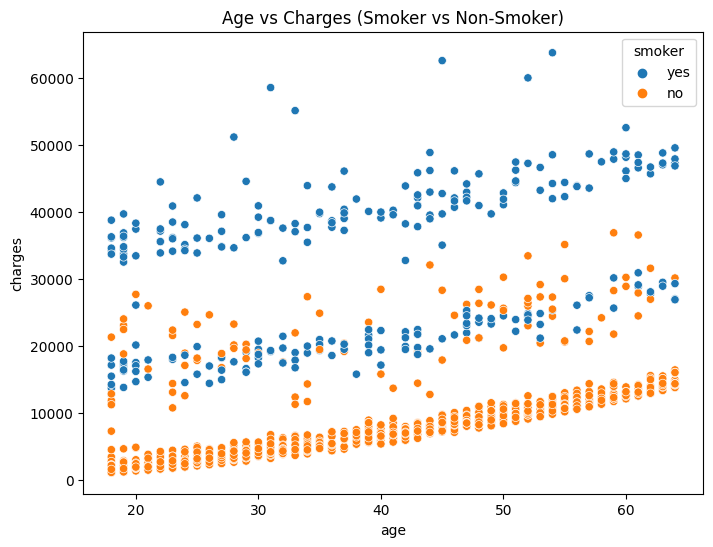

In [7]:
# Scatter plot for Age vs. Charges, differentiated by Smoker status
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age',y='charges', hue='smoker', data=med_data)
plt.title('Age vs Charges (Smoker vs Non-Smoker)')
plt.show()

# Count number of male and female

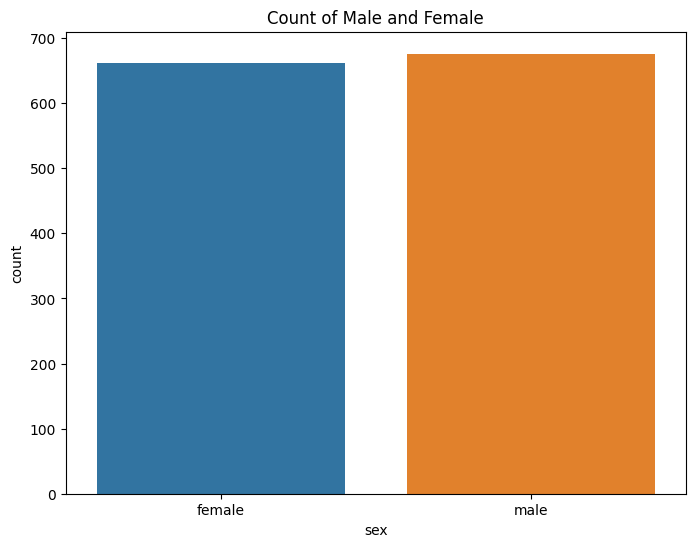

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x=med_data["sex"])
plt.title("Count of Male and Female")
plt.show()

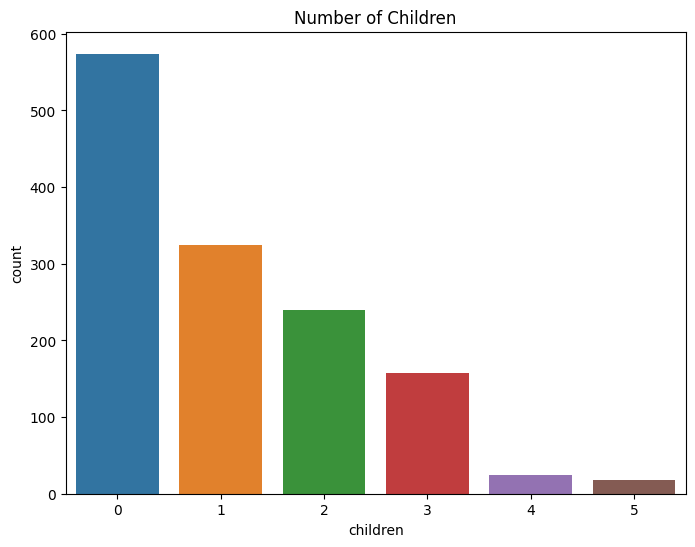

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x=med_data["children"])
plt.title("Number of Children")
plt.show()

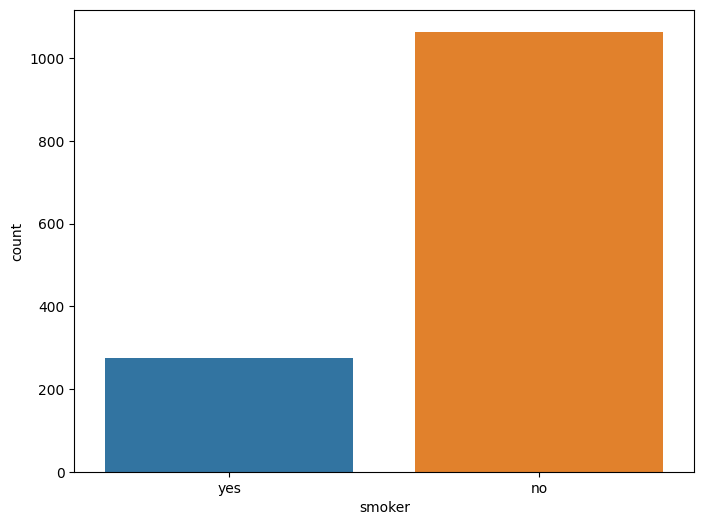

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x=med_data["smoker"])
plt.show()

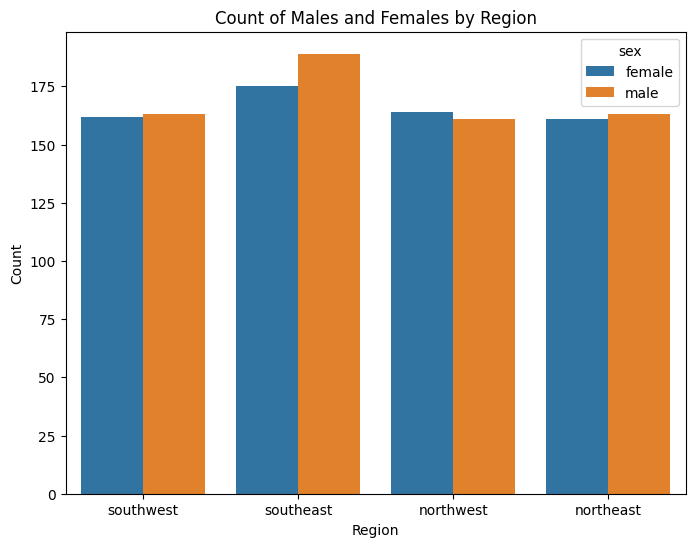

In [11]:
# Create the count plot
plt.figure(figsize=(8,6))
sns.countplot(x='region', hue='sex', data=med_data)
plt.title('Count of Males and Females by Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Display the plot
plt.show()

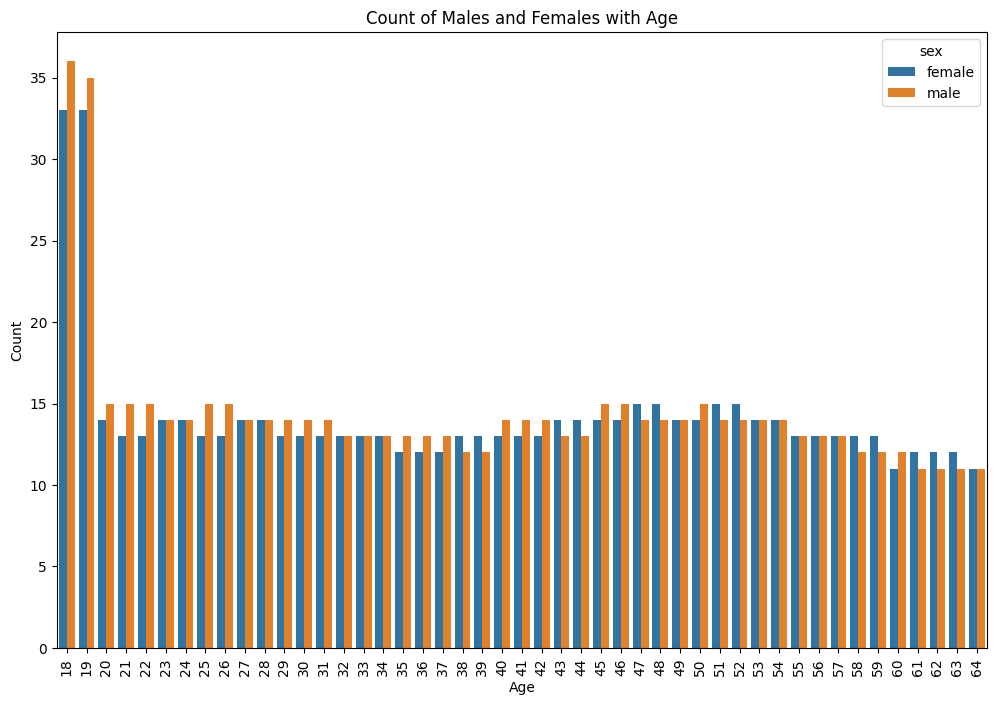

In [12]:
# Create the count plot
plt.figure(figsize=(12,8))
sns.countplot(x='age', hue='sex', data=med_data)
plt.title('Count of Males and Females with Age')
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.ylabel('Count')

# Display the plot
plt.show()

In [13]:
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Convert Categorical Col into Numerical

In [14]:
med_data["sex"]=med_data["sex"].map({"male":1,"female":0})


In [15]:
med_data["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [16]:
med_data["smoker"]=med_data["smoker"].map({"yes":1,"no":0})

In [17]:
med_data["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [18]:
med_data["region"]=med_data["region"].map({"southeast":0,"southwest":1,"northwest":2,"northeast":3})

In [19]:
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


# train test split

In [20]:
X=med_data.drop(columns="charges")
y=med_data["charges"]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

In [22]:
X_train.shape

(1204, 6)

In [23]:
X_test.shape

(134, 6)

In [24]:
lg=LinearRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

In [25]:
r2_score(y_test,y_pred)

0.7058997983752826

In [26]:
df_input=(19,0,27.900,0,1,1)
np_input=np.asarray(df_input)
df_input_reshaped=np_input.reshape(1,-1)
prediction=lg.predict(df_input_reshaped)
print("Meidcal insurance:",prediction)

Meidcal insurance: [25925.06977975]


C:\Users\abc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save the model using pickle

In [33]:
import pickle as pkl
pkl.dump(lg,open("model/medical_insurance.pkl","wb"))

In [31]:

model=pkl.load(open("medical_insurance.pkl","rb"))

In [32]:
import joblib
joblib.dump(lg, 'model.joblib')

['model.joblib']